In [517]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [518]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df=pd.concat((train, test)).reset_index(drop=True)
trainingSetLength = len(train)
Id=test.Id
print(trainingSetLength)

1460


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [519]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64


In [520]:
categorical = [col for col in df.columns if df[col].dtypes == "object"]
print(categorical,len(categorical))

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities'] 43


### Replace NA Values and encode for many categorical features
--> For a lot of Data, a NaN means that there is no such object in the house : no fence, or no pool, ...

--> Careful, we must keep the order during encoding for some data (like quality ranking)

In [521]:
# replace NaN with a unique value "NO"
for c in categorical:
    df[c]=df[c].fillna("NO")

In [522]:
for c in categorical:
    print(c,df[c].unique())

Alley ['NO' 'Grvl' 'Pave']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
BsmtCond ['TA' 'Gd' 'NO' 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'NO']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NO' 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' 'NO' 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual ['Gd' 'TA' 'Ex' 'NO' 'Fa']
CentralAir ['Y' 'N']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'NO']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
ExterQual ['Gd' 'TA' 'Ex' 'Fa']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' 'NO']
Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock' 'NO']
Fence ['NO' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu ['

In [523]:
colo=[]
for c in categorical:
    if "Gd" in df[c].unique().tolist() and "Av" not in df[c].unique().tolist() :
        colo.append(c)
        print(c,df[c].unique())
listToMap = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NO':0}
for c in colo:
    df[c]=df[c].map(listToMap)

BsmtCond ['TA' 'Gd' 'NO' 'Fa' 'Po']
BsmtQual ['Gd' 'TA' 'Ex' 'NO' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
ExterQual ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu ['NO' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageCond ['TA' 'Fa' 'NO' 'Gd' 'Po' 'Ex']
GarageQual ['TA' 'Fa' 'Gd' 'NO' 'Ex' 'Po']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa' 'NO']
PoolQC ['NO' 'Ex' 'Fa' 'Gd']


In [524]:
colo=[]
for c in categorical:
    if "Av" in df[c].unique().tolist() and "Gd" in df[c].unique().tolist() :
        colo.append(c)
        print(c,df[c].unique())
listToMap = {'Ex': 5, 'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1,'NO':0}
for c in colo:
    df[c]=df[c].map(listToMap)

BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'NO']


In [525]:
colo=[]
for c in categorical:
    if 'GLQ'  in df[c].unique().tolist() :
        colo.append(c)
        print(c,df[c].unique())
listToMap = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NO': 0}
for c in colo:
    df[c]=df[c].map(listToMap)

BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NO' 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' 'NO' 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [526]:
colo=["Fence"]
listToMap = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NO': 0}
for c in colo:
    df[c]=df[c].map(listToMap)

In [527]:
colo=["Functional"]
listToMap = {'Typ': 7,'Min1': 6,'Min2': 5,'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'NO': 0}
for c in colo:
    df[c]=df[c].map(listToMap)

In [528]:
colo=["GarageFinish"]
listToMap = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NO': 0}
for c in colo:
    df[c]=df[c].map(listToMap)

listToMap = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, 'NO': 4}
df['LotShape'] = df['LotShape'].map(listToMap)

listToMap = {'Lvl': 4, 'Bnk': 3, 'HLS':2,'Low':1,'NO': 4}
df['LandContour'] = df['LandContour'].map(listToMap)

listToMap = {'Gtl':3,'Mod':2,'Sev':1}
df['LandSlope'] = df['LandSlope'].map(listToMap)


In [529]:
df["Electrical"].describe()

count      2919
unique        6
top       SBrkr
freq       2671
Name: Electrical, dtype: object

In [530]:
# with most frequent value
listToMap = {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1,'NO':5}
df['Electrical'] = df['Electrical'].map(listToMap)

In [531]:
df["Electrical"].unique()

array([5, 3, 4, 2, 1])

In [532]:
# filling with most frequent value
listToMap = {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1,'NO':4}
df['Utilities'] = df['Utilities'].map(listToMap)

In [533]:
# binary  variables
df['CentralAir'] = df['CentralAir'].replace("N","0")
df['CentralAir'] = df['CentralAir'].replace("Y","1")
df['CentralAir'] = df['CentralAir'].astype(int)

In [534]:
categorical = [col for col in df.columns if df[col].dtypes == "object"]
print(len(categorical))

21


In [535]:
df.MasVnrType.describe(include='all')
df["MasVnrType"] = df["MasVnrType"].replace("NO","None")

In [536]:
print(df["MasVnrArea"][df["MasVnrType"]=='None'])
# if MasVnrType = None, MasVnrArea should be 0
df["MasVnrArea"] = df["MasVnrArea"].fillna(0.0).astype(float)

1       0.0
3       0.0
5       0.0
8       0.0
9       0.0
       ... 
2913    0.0
2914    0.0
2915    0.0
2916    0.0
2917    0.0
Name: MasVnrArea, Length: 1766, dtype: float64


In [537]:
for c in categorical:
        print(c,df[c].unique())

Alley ['NO' 'Grvl' 'Pave']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' 'NO']
Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock' 'NO']
Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'NO' 'Basment' '2Types']
Heating ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH' 'NO']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn']
MiscFeatur

For the next features, we will fill the Na values with the most frequent value

In [538]:
df.groupby("BsmtFinType1")["BsmtFinSF1"].describe()


,count,mean,std,min,25%,50%,75%,max
BsmtFinType1,,,,,,,,
0,78.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
1,851.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
2,154.0,387.064935,272.610514,16.0,187.0,325.0,530.25,1237.0
3,288.0,465.524306,279.845738,16.0,252.0,414.5,625.25,1332.0
4,269.0,527.732342,275.210210,25.0,330.0,516.0,678.00,1500.0
5,429.0,621.051282,307.982130,20.0,384.0,600.0,788.00,1880.0
6,849.0,808.012956,484.657026,2.0,505.0,775.0,1094.00,5644.0


In [539]:
df["BsmtFinSF1"] =  df.groupby("BsmtFinType1")["BsmtFinSF1"].transform(
    lambda x: x.fillna(x.median()))
df["BsmtFinSF2"] =  df.groupby("BsmtFinType2")["BsmtFinSF2"].transform(
    lambda x: x.fillna(x.median()))
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0)
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0)
df["BsmtUnfSF"] = df["BsmtHalfBath"].fillna(0)
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0)

[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'Wd Shng'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'CmentBd'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'Brk Cmn'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'AsphShn'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'CBlock'),
 Text(0, 0, 'NO')]

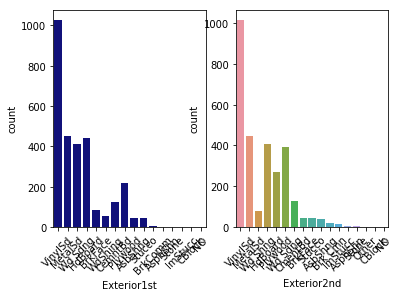

In [540]:
fig, ax =plt.subplots(1,2)
c=sns.countplot(df["Exterior1st"], color="darkBlue",ax=ax[0])
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c2=sns.countplot(df['Exterior2nd'], ax=ax[1])
c2.set_xticklabels(c2.get_xticklabels(),rotation=45)

In [541]:
df["Exterior1st"] = df["Exterior1st"].replace("NO","VinylSd")
df["Exterior2nd"] = df["Exterior2nd"].replace("NO","VinylSd")

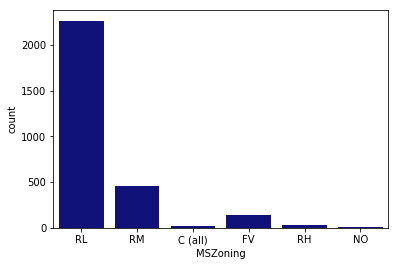

In [542]:
fig, ax =plt.subplots()
c=sns.countplot(df["MSZoning"], color="darkBlue")
df["MSZoning"] = df["MSZoning"].replace("NO","RL")

In [543]:
df["GarageArea"] = df["GarageArea"].fillna(0)
df["GarageCars"] = df["GarageCars"].fillna(0)

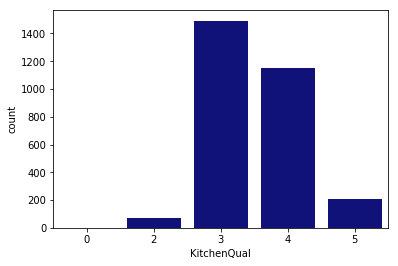

In [544]:
fig, ax =plt.subplots()
c=sns.countplot(df["KitchenQual"], color="darkBlue")

df["KitchenQual"] = df["KitchenQual"].replace(0,3)

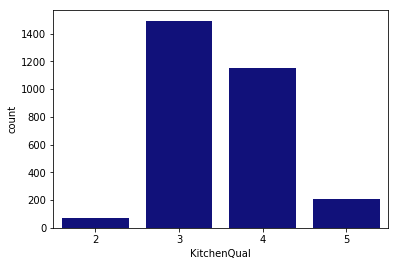

In [545]:
fig, ax =plt.subplots()
c=sns.countplot(df["KitchenQual"], color="darkBlue")

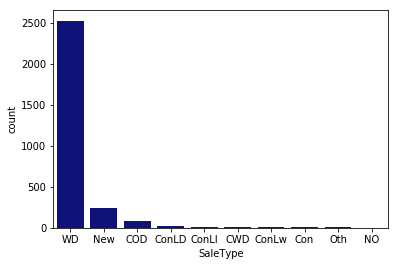

In [546]:
fig, ax =plt.subplots()
c=sns.countplot(df["SaleType"], color="darkBlue")
df["SaleType"] = df["SaleType"].replace("NO","WD")

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


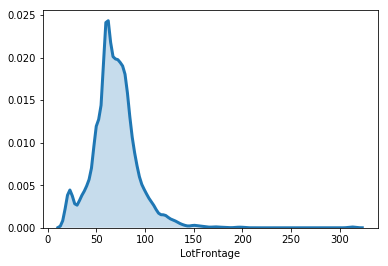

In [547]:
g = sns.distplot(df['LotFrontage'],hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

In [548]:
df["LotFrontage"] =  df.groupby("MSZoning")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

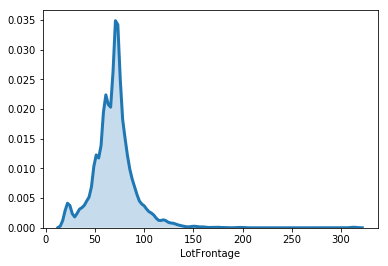

In [549]:
g = sns.distplot(df['LotFrontage'],hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

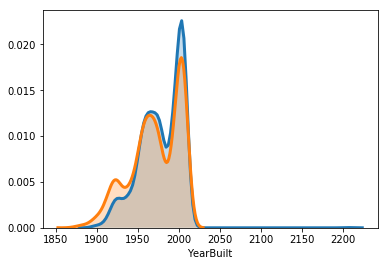

In [550]:
g = sns.distplot(df['GarageYrBlt'],hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
g = sns.distplot(df['YearBuilt'],hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
#Both distribution are quite correlated so we fill the missing values of garageYrBlt with the house construction date
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['YearBuilt'])

In [551]:
print(df.isnull().sum()[df.isnull().sum() > 0])

SalePrice    1459
dtype: int64


### Re-encodingother features

In [552]:
#MSSubClass into a categorical variable
#df['MSSubClass'] = df['MSSubClass'].apply(str)

# OverallCond into a categorical variable
#df['OverallCond'] = df['OverallCond'].astype(str)

#Year and month sold 
#df['YrSold'] = df['YrSold'].astype(str)
#df['MoSold'] = df['MoSold'].astype(str)

**For some features, reduce the skewness of the distribution**

In [553]:
numericals= df.dtypes[df.dtypes != "object"].index
for k in numericals:
    if df[k].skew() > 5:
        print(" {0} Skewness: {1}".format(k,df[k].skew()))

 3SsnPorch Skewness: 11.381914394786643
 LotArea Skewness: 12.829024853018762
 LowQualFinSF Skewness: 12.094977192517302
 MiscVal Skewness: 21.958480324447216
 PoolArea Skewness: 16.9070172435751
 PoolQC Skewness: 18.418602914039553


Skewness: 12.829025
 3SsnPorch Skewness: 8.82979381978806
 LotArea Skewness: -0.505010100221913
 LowQualFinSF Skewness: 8.56209088801536
 MiscVal Skewness: 5.216664735729965
 PoolArea Skewness: 15.006047051771919
 PoolQC Skewness: 17.565997407620802
Skewness: -0.505010


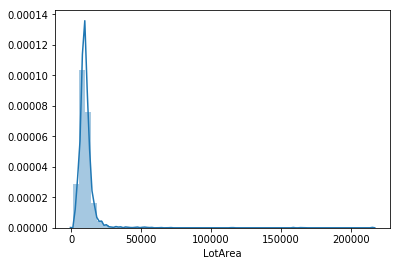

In [554]:
sns.distplot(df['LotArea']);
print("Skewness: %f" % df['LotArea'].skew())
for k in numericals:
    if df[k].skew() > 5:
        df[k] = np.log1p(df[k])
        df =df.replace([np.inf, -np.inf], np.nan)
        print(" {0} Skewness: {1}".format(k,df[k].skew()))
print("Skewness: %f" % df['LotArea'].skew())

## Back to the traininSet : Correlations with the continuous variables

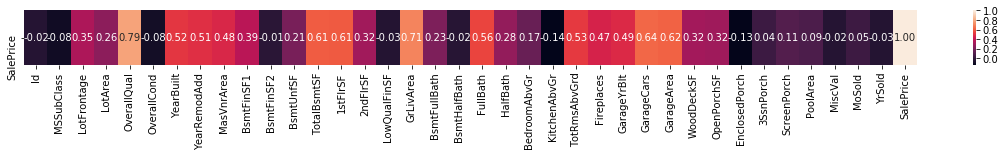

In [555]:
t = train.select_dtypes(exclude = 'object') # keep the continuous variables
tcorr = t.corr()
f, ax = plt.subplots(figsize = (20,1)) 
sns.heatmap(tcorr.sort_values(by = 'SalePrice', ascending = False).head(1),annot = True, fmt = ".2f")
plt.show()



This will help to drop some data that seem not relevant

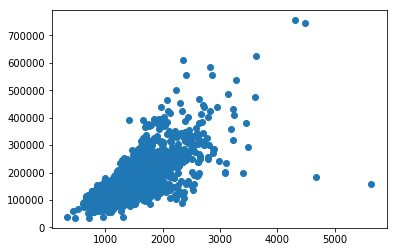

In [556]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
# Outliers are the points with GrLivArea over 4000 

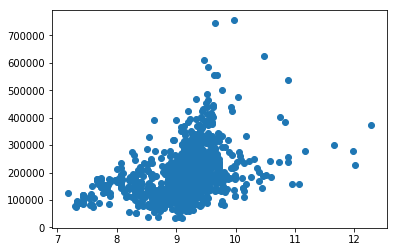

In [557]:
fig, ax = plt.subplots()
ax.scatter(x = df['LotArea'], y = df['SalePrice'])
# We keep those for now

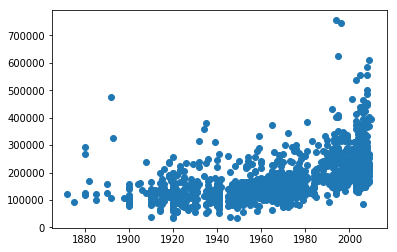

In [558]:
fig, ax = plt.subplots()
ax.scatter(x = df['YearBuilt'], y = df['SalePrice'])

New buildings are more valuable than old rocks!

In [559]:
#Drop some columns that seem not relevant. Will see later if we need it
df = df.drop(['MoSold','3SsnPorch','BsmtHalfBath','LowQualFinSF','YrSold',
             #'Neighborhood',
              'Condition2',
            'Exterior1st','Exterior2nd',
             'PoolQC',
              'Alley',
             'Street'
             ], axis = 1)

# Modeling

## Preparation

In [560]:
categorical_cols = [col for col in df.columns if df[col].dtypes == "object"]
cat_df = df.loc[:, categorical_cols]
cat_df = pd.get_dummies(cat_df)
print(cat_df.shape)
cat_df.head()
df = df.drop(categorical_cols, axis = 1)
df = pd.concat([df, cat_df], axis = 1, join = 'inner')
print(df.shape)

(2919, 117)
(2919, 171)


### Dealing With Outliers

In [561]:

train = df[:trainingSetLength]
test = df[trainingSetLength:]

#print(test.isnull().sum()[test.isnull().sum() > 0])
test=test.drop(columns=['SalePrice'])

#Dropping outliers
train=train.drop(train[(train['GrLivArea'] >4000)].index)
train=train.drop(train[(train['YearBuilt'] > 1960) &(train['YearBuilt'] < 2000) &(train['SalePrice']>600000)].index)
train=train.drop(train[(train['YearBuilt'] < 1920) &(train['SalePrice']>260000)].index)
train=train.drop(train[(train['YearBuilt'] < 1940) &(train['SalePrice']>350000)].index)

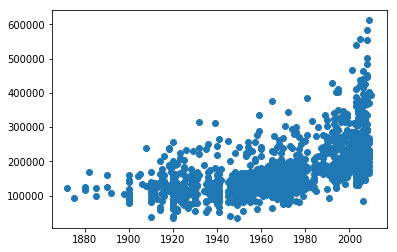

In [562]:
fig, ax = plt.subplots()
ax.scatter(x = train['YearBuilt'], y = train['SalePrice'])


### Transformations

In [563]:
# log transformation for some features
cols = [   'LotArea','BsmtUnfSF',
           'MasVnrArea', 'TotalBsmtSF','BsmtFinSF2','BsmtFinSF1',
           'GarageArea','GrLivArea','GrLivArea','1stFlrSF','2ndFlrSF'
            ]
for col in cols:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])

In [564]:
#Log transformation of SalePrice
train["SalePrice"] = np.log1p(train["SalePrice"])

In [565]:
train.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,...,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.00000,1449.000000
mean,7.003666,2.830814,2.860594,2.935128,1.623188,4.227435,0.660373,3.544513,1.249137,0.425121,...,0.084886,0.029676,0.002761,0.001380,0.006211,0.003451,0.003451,0.082816,0.00207,0.868185
std,0.312331,3.282751,0.815018,0.553681,1.063021,2.987524,1.851152,2.106518,0.895454,0.517728,...,0.278808,0.169749,0.052486,0.037139,0.078593,0.058661,0.058661,0.275699,0.04547,0.338406
min,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.783325,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,6.987490,0.000000,3.000000,3.000000,1.000000,5.950643,0.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,7.232010,6.590301,3.000000,3.000000,2.000000,6.563856,0.000000,6.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,8.079928,7.385231,8.000000,4.000000,4.000000,7.691200,7.296413,6.000000,6.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## Split the sets

In [566]:
print(train.shape,test.shape)

(1449, 171) (1459, 170)


In [567]:
train =train.replace([np.inf, -np.inf], np.nan)
cols_with_missing = [col for col in train.columns 
                                 if train[col].isnull().any()]
print(cols_with_missing)

[]


In [568]:
train_X = train.drop(columns = 'SalePrice')
train_Y = train['SalePrice']
#print(train_X.describe(include='all'))
print(train_X.shape,train_Y.shape)

(1449, 170) (1449,)


In [569]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test = train_test_split(train_X,
                                                    train_Y, 
                                                    test_size=0.25, 
                                                    random_state=12)

In [570]:
y_train = pd.DataFrame(y_train)
x_train = pd.DataFrame(x_train)
with pd.option_context('mode.use_inf_as_null', True):
    count_null = y_train.select_dtypes(include= 'object').isnull().sum()
    count_null = count_null[count_null > 0]
    print(count_null)

Series([], dtype: float64)


In [571]:
#cols_with_missing = [col for col in x_train.columns 
#                                 if x_train[col].isnull().any()]
#print(cols_with_missing)

In [572]:
#x_train = x_train.replace(-np.inf, np.nan)
#print(x_train.shape)


In [573]:
#x_train[~x_train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [574]:
x_train =x_train.replace([np.inf, -np.inf], np.nan)
cols_with_missing = [col for col in x_train.columns 
                                 if x_train[col].isnull().any()]
print(cols_with_missing)

[]


In [575]:
from sklearn.model_selection import GridSearchCV
from sklearn import  ensemble
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingRegressor
#from xgboost.sklearn import XGBRegressor

GB = ensemble.GradientBoostingRegressor()
grid = {
          'n_estimators':[n for n in range(200, 300, 20)],
          'max_depth': [n for n in range(2, 4,2)],
          'min_samples_leaf': [n for n in range(2,5,1)],
          'min_samples_split': [n for n in range(6,12,2)],
          #'max_features': ['sqrt'],
          'random_state' : [13]
            }

GB_model = GridSearchCV(GB, param_grid = grid, cv = 7, n_jobs = -1)
GB_model.fit(x_train, y_train)

print("Best Hyper Parameters: ",GB_model.best_params_)
print("Best Score: " + '%.3f' % GB_model.best_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyper Parameters:  {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 260, 'random_state': 13}
Best Score: 0.904


In [576]:
from sklearn.metrics import r2_score, mean_squared_error
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def test_trainSet(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [577]:
test_trainSet(GB_model, x_train, x_test, y_train, y_test)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [578]:
## Average R2 score and standart deviation of 5-fold cross-validation
#res = cross_val_score(GB_model, train_X, train_Y, cv=5)
#print("Accuracy: %0.2f (+/- %0.2f)" % (res.mean(), res.std() * 2))

In [579]:
predictions = GB_model.predict(np.array(test))

In [580]:
predictionsToSubmit = pd.DataFrame(np.exp(predictions), columns = ['SalePrice'])
predictionsToSubmit = predictionsToSubmit.join(Id)


## Saving to CSV
pd.DataFrame({'Id': predictionsToSubmit.Id, 'SalePrice': predictionsToSubmit.SalePrice}).to_csv('test.csv', index =False)    

predictionsToSubmit.shape

(1459, 2)